# **Model Building in Scikit-learn**

# Scikit-learn which is an open-source Python library which helps in making machine learning more accessible.








consistent interface for a variety of tasks like


*   Classification
*   Regression
*   clustering
*   data preprocessing
*   model evaluation.


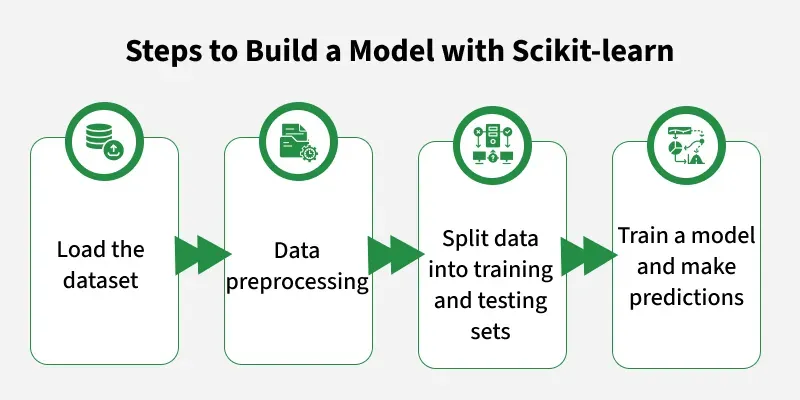


pip install -U scikit-learn


# **Step 1: Loading a Dataset**

Features and Targets:
  
*   X contains the input data (features like petal length, width etc)
*   y contains the target values (species of the iris flower).



In [ ]:
from sklearn.datasets import load_iris

iris=load_iris()

feature_names=iris.feature_names
target_names=iris.target_names

print("Feature names:",feature_names)
print("Target names:",target_names)

X=iris.data
y=iris.target

print(X.shape)
print(y.shape)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
(150, 4)
(150,)


In [ ]:
import pandas as pd

df=pd.DataFrame(X,columns=feature_names)
df['species']=y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# **Step:2 Splitting Dataset**




*  working with machine learning models handling large datasets can be computationally expensive.
*   To make training efficient and to evaluate model performance fairly we split the data into two parts

 Training set and the testing set.

*  The training set is used to teach the model to recognize patterns while the testing set helps us check how well the model performs on new, unseen data. This separation helps in preventing overfitting and gives a more accurate measure of how the model will work in real-world situations.
*    In Scikit-learn the train_test_split function from the **sklearn.model_selection** module makes this easy.

After splitting, we get four subsets:

*   **X_train** and **y_train**: Features and target values used to train the model.
*   **X_test** and **y_test**: Features and target values reserved for testing.










In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)


X_train:  (120, 4)
X_test:  (30, 4)
y_train:  (120,)
y_test:  (30,)


# **Step:3 handling Categorical values**

*   Machine learning algorithms require numerical input so handling categorical data correctly is important.
*    If categorical variables are left as text, the algorithms may misinterpret their meaning which leads to poor results.

To avoid this we convert categorical data into numerical form using encoding techniques which are as follows.


1.   LabelEncoder
2.   OneHotEncoder

## LabelEncoder

*  **LabelEncoder()** → It is initialized to create an encoder object that will convert categorical values into numerical labels.
*   **fit()** → Learn something from the data (but don’t actually change/return the data).

*   **transform()** → Creates the one-hot matrix based on what was learned.
*   **fit_transform()** → Do both in one step (learn + transform).

Categorical data is broadly divided into two types.


*   **Nominal Data**: Categories without inherent order (e.g., colors: red, blue, green).
*   **Ordinal Data**: Categories with a natural order (e.g., satisfaction levels: low, medium, high).


# **1. LabelEncoder**

In [1]:
import pandas as pd

animals=pd.Series(["Cat","dog","camel","Dog","cat","Camel","dog","cAt"])
animals

,0
0,Cat
1,dog
2,camel
3,Dog
4,cat
5,Camel
6,dog
7,cAt


In [2]:
animals=animals.str.lower()

In [5]:
#using pandas
animals.astype('category').cat.codes
dict(enumerate(animals.astype('category').cat.categories))

{0: 'camel', 1: 'cat', 2: 'dog'}

In [7]:
#using Sklearn Library
df=pd.DataFrame({"Place":["kalburagi","Vijayapur","Raichur","VijayaPur","RAichur","Kalburagi"],
                 "Remarks":["Good","Best","Amazing","Good","Good","Best"]})
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
#handle case
df['Place']=df['Place'].str.lower()
#create Encoder matrix
df['Place_encoded']=Le.fit_transform(df['Place'])
df

,Place,Remarks,Place_encoded
0,kalburagi,Good,0
1,vijayapur,Best,2
2,raichur,Amazing,1
3,vijayapur,Good,2
4,raichur,Good,1
5,kalburagi,Best,0


# Ordinal Encoder

In [8]:
df=pd.DataFrame({"Place":["kalburagi","Vijayapur","Raichur","VijayaPur","RAichur","Kalburagi"],
                 "Remarks":["Good","Best","Amazing","Good","Good","Best"]})
df['Remarks']
sataisfaction={"Good":0,"Best":1,"Amazing":2}

In [9]:
#using pandas Encoding technique
df["Pandas_enc_remarks"]=df['Remarks'].map(sataisfaction)

In [10]:
#using sklearn Encoding Technique
from sklearn.preprocessing import OrdinalEncoder

satisfactor=[["Good","Amazing","Best"]]
Oe=OrdinalEncoder(categories=satisfactor)
df["Sklear_encoded"]=Oe.fit_transform(df[["Remarks"]])
df

,Place,Remarks,Pandas_enc_remarks,Sklear_encoded
0,kalburagi,Good,0,0.0
1,Vijayapur,Best,1,2.0
2,Raichur,Amazing,2,1.0
3,VijayaPur,Good,0,0.0
4,RAichur,Good,0,0.0
5,Kalburagi,Best,1,2.0


# **2. OneHotEncoder**

*  One Hot Encoding is a method for converting categorical variables into a binary format.
*   It creates new columns for each category where **1** means the category is present and **0** means it is not.






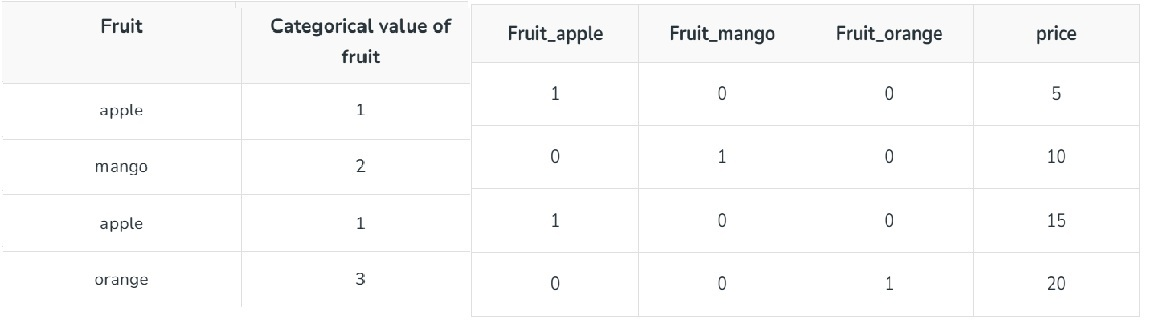
*   Pandas offers the **get_dummies** function which is a simple and effective way to perform one-hot encoding. This method converts categorical variables into multiple binary columns.
*   For example the Gender column with values 'M' and 'F' becomes two binary columns: Gender_F and Gender_M.

*   **drop_first=True** in pandas drops one redundant column e.g., keeps only Gender_F to avoid multicollinearity.

In [27]:
import numpy as np
Data={"Gender":['m','f','M','m','F','f','M'],"Remarks":['Good','Best','Better','better','good','best','good']}
Df=pd.DataFrame(Data)
Df[["Gender","Remarks"]]=Df[["Gender","Remarks"]].apply(lambda x:x.str.capitalize())
#using pandas getDummies()
Df_encoded=pd.get_dummies(Df,columns=['Gender','Remarks'],drop_first=True)
Df_encoded
#Create Dataframe for both
new_Df=pd.concat([Df,Df_encoded],axis=1)
new_Df

,Gender,Remarks,Gender_M,Remarks_Better,Remarks_Good
0,M,Good,True,False,True
1,F,Best,False,False,False
2,M,Better,True,True,False
3,M,Better,True,True,False
4,F,Good,False,False,True
5,F,Best,False,False,False
6,M,Good,True,False,True


In [32]:
from sklearn.preprocessing import OneHotEncoder
Ohe=OneHotEncoder(sparse_output=False)
categories=['Gender','Remarks']
Ohe_Encoded=Ohe.fit_transform(Df[categories])
#create A DataFrame for Encoder
one_hot_df=pd.DataFrame(Ohe_Encoded,columns=Ohe.get_feature_names_out(categories))


In [31]:
#concat onehot Dataframe with originall Df
Sklean_encoded_df=pd.concat([Df,one_hot_df],axis=1)
Sklean_encoded_df

,Gender,Remarks,Gender_F,Gender_M,Remarks_Best,Remarks_Better,Remarks_Good
0,M,Good,0.0,1.0,0.0,0.0,1.0
1,F,Best,1.0,0.0,1.0,0.0,0.0
2,M,Better,0.0,1.0,0.0,1.0,0.0
3,M,Better,0.0,1.0,0.0,1.0,0.0
4,F,Good,1.0,0.0,0.0,0.0,1.0
5,F,Best,1.0,0.0,1.0,0.0,0.0
6,M,Good,0.0,1.0,0.0,0.0,1.0


# **Step 4: Training the Model**
Now that our data is ready, it’s time to train a machine learning model. Scikit-learn has many algorithms with a consistent interface for training, prediction and evaluation. Here we’ll use **Logistic Regression** as an example.



*   **log_reg = LogisticRegression(max_iter=200)**: Creating a logistic regression classifier object.

*   **log_reg.fit(X_train, y_train)**: Using this the logistic regression model adjusts the model’s parameters to best fit the data.



In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(max_iter=200)
LR.fit(X_train,y_train)

# Step 5: Make Predictions
Once trained we use the model to make predictions on the test data **X_test** by calling the predict method. This returns predicted labels y_pred.

**log_reg.predict**: It uses trained logistic regression model to predict labels for the test data X_test.

In [ ]:
y_prediction=LR.predict(X_test)

# Step 6: Evaluating Model Accuracy
Check how well our model is performing by comparing **y_test** and **y_pred**. Here we are using the metrics module's method accuracy_score.

In [ ]:
from sklearn import metrics
print("My Accuracy Score: ",metrics.accuracy_score(y_test,y_prediction))

# Step 7: Model Training
This process involves exposing model to historical data allowing it to learn patterns, relationships and dependencies within the dataset.

Here are the basic features of Model Training:



*  **Iterative Process:** Train the model iteratively, adjusting parameters to minimize errors and enhance accuracy.

*  **Optimization:** Fine-tune model to optimize its predictive capabilities.


*  **Validation:** Rigorously train model to ensure accuracy to new unseen data.






In [ ]:
sample=[[5,4,3,2],[2,3,5,4]]
pred=LR.predict(sample)
predicted_species=[iris.target_names[p] for p in pred]
predicted_species

# Step 8: Model Evaluation and Tuning
Model evaluation involves rigorous testing against validation or test datasets to test accuracy of model on new unseen data. It provides insights into model's strengths and weaknesses. If the model fails to acheive desired performance levels we may need to tune model again and adjust its hyperparameters to enhance predictive accuracy.

Here are the basic features of Model Evaluation and Tuning:


*   **Evaluation Metrics:** Use metrics like *accuracy*, *precision*, *recall* and *F1 score* to evaluate model performance.


*   **Strengths and Weaknesses:** Identify the strengths and weaknesses of the model through rigorous testing.



*   **Iterative Improvement:** Initiate model tuning to adjust hyperparameters and enhance predictive accuracy.


*   **Model Robustness:** Iterative tuning to achieve desired levels of model robustness and reliability.






# Step 9: Model Deployment
Now model is ready for deployment for real-world application. It involves integrating the predictive model with existing systems allowing business to use this for informed decision-making.

*   Integrate with existing systems
Enable decision-making using predictions
Ensure deployment scalability and security
Provide *APIs* or pipelines for production use

*italicized text*

# Step 10: Model Monitoring and Maintenance
After Deployment models must be monitored to ensure they perform well over time. Regular tracking helps detect data drift, accuracy drops or changing patterns and retraining may be needed to keep the model reliable in real-world use.

Here are the basic features of Model Monitoring and Maintenance:

Track model performance over time
Detect data drift or concept drift
Update and retrain the model when accuracy drops
Maintain logs and alerts for real-time issues
Each step is essential for building a successful machine learning model that can provide valuable insights and predictions. By following the Machine learning lifecycle organizations we can solve complex problems.